# Question 2

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
src_image = cv2.imread("img1.jpg",flags=cv2.IMREAD_GRAYSCALE)
src_image

array([[159, 159, 159, ..., 153, 153, 152],
       [155, 157, 158, ..., 152, 151, 150],
       [156, 156, 157, ..., 152, 151, 150],
       ...,
       [120, 121, 128, ..., 125, 116, 106],
       [122, 119, 124, ..., 129, 117, 104],
       [126, 122, 127, ..., 112, 110, 119]], dtype=uint8)

In [ ]:
kernel1 = (1/9) * np.array([
                            [1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]
                           ])

kernel2 = np.array([
                    [-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]
                   ])

kernel3 = np.array([
                    [-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]
                   ])

kernel4 = np.array([
                    [-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]
                   ])

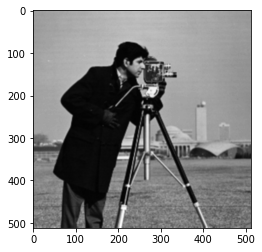

In [ ]:
resulting_image = cv2.filter2D(src_image, -1, kernel1)
plt.imshow(resulting_image, cmap='gray')
plt.show()

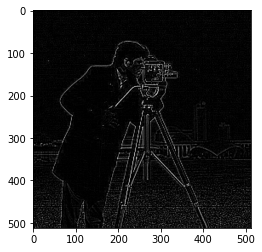

In [ ]:
resulting_image = cv2.filter2D(src_image, -1, kernel2)
plt.imshow(resulting_image, cmap='gray')
plt.show()

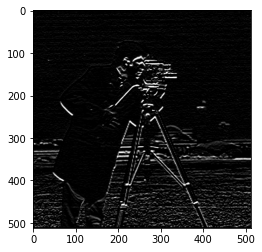

In [ ]:
resulting_image = cv2.filter2D(src_image, -1, kernel3)
plt.imshow(resulting_image, cmap='gray')
plt.show()

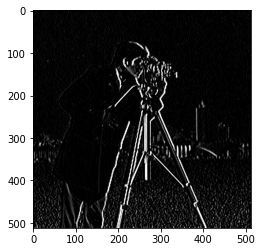

In [ ]:
resulting_image = cv2.filter2D(src_image, -1, kernel4)
plt.imshow(resulting_image, cmap='gray')
plt.show()

# Question 3

In [1]:
import tensorflow as tf
import numpy as np
!pip install keras-tuner --upgrade -q
import keras_tuner as kt

     |████████████████████████████████| 98 kB 3.8 MB/s 


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
height, width, channels = x_train[0].shape
x_train = x_train/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
x_test = x_test/255.0
y_test = tf.keras.utils.to_categorical(y_test, 10)

170508288/170498071 [==============================] - 3s 0us/step


In [6]:
def build_model(hp):
    input_layer = tf.keras.layers.Input(shape=(height, width, channels))
    conv_layers = hp.Int(name='conv_layers', min_value=1, max_value=3, step=1)
    dense_layers = hp.Int(name='dense_layers', min_value=1, max_value=4, step=1)
    units = hp.Int(name='units', min_value=128, max_value=256, step=64)
    filters = hp.Int( name='filters', min_value=8, max_value=32, step=8)
    r = 0.1
    x = input_layer
    for i in range(conv_layers):
        filters *= 2
        r += 0.1
        x = tf.keras.layers.Conv2D(filters, (3,3), activation='relu', padding='same')(x)
        x = tf.keras.layers.Conv2D(filters, (3,3), activation='relu', padding='same')(x)
        x = tf.keras.layers.MaxPool2D()(x)
        x = tf.keras.layers.Dropout(r)(x)
    x = tf.keras.layers.Flatten()(x)
    for i in range(dense_layers):
        x = tf.keras.layers.Dense(units, activation='relu')(x)
        x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs=input_layer, outputs=x)
    lr = hp.Choice(name='learning_rate', values=[0.0001, 0.0005, 0.001])
    opt = hp.Choice(name='optimizer', values=['adam', 'sgd'])
    if opt == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif opt == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    else:
        optimizer = None
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    return model

In [7]:
tuner = kt.Hyperband(
    hypermodel=build_model,
    max_epochs=10,
    hyperband_iterations=1,
    factor=3,
    directory='./Q3',
    objective='val_accuracy',
)
tuner.search_space_summary()

INFO:tensorflow:Reloading Oracle from existing project ./Q3/untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./Q3/untitled_project/tuner0.json
Search space summary
Default search space size: 6
conv_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
dense_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 256, 'step': 64, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': None}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001], 'ordered': True}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd'], 'ordered': False}


In [8]:
tuner.search(x_train, y_train, batch_size=128, validation_split=0.2)

Trial 31 Complete [00h 03m 24s]
val_accuracy: 0.5498999953269958

Best val_accuracy So Far: 0.6915000081062317
Total elapsed time: 00h 23m 48s
INFO:tensorflow:Oracle triggered exit


In [9]:
tuner.results_summary()

Results summary
Results in ./Q3/untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
conv_layers: 2
dense_layers: 2
units: 128
filters: 24
learning_rate: 0.0005
optimizer: adam
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: fb17ea19791ceaaaaef1cd0a85512a90
Score: 0.6915000081062317
Trial summary
Hyperparameters:
conv_layers: 1
dense_layers: 4
units: 192
filters: 16
learning_rate: 0.001
optimizer: adam
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: bd678e065bbe93f3ffaa937284aea69f
Score: 0.5910999774932861
Trial summary
Hyperparameters:
conv_layers: 3
dense_layers: 3
units: 128
filters: 24
learning_rate: 0.0001
optimizer: adam
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.5498999953269958
Trial summary
Hyperparameters:
conv_layers: 2
dense_layers: 3
units: 192
filters: 32
learning_rate: 0.0001
optimizer: ad

In [10]:
best_hp = tuner.get_best_hyperparameters(2)[0]
best_model = build_model(best_hp)
best_model.summary()
best_model.fit(x=x_train, y=y_train, validation_split=0.2, batch_size=128, epochs=50)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 48)        1344      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 48)        20784     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 48)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 48)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 96)        41568     
                                                           

In [11]:
print("train loss and accuracy:", best_model.evaluate(x_train, y_train))
print("test loss and accuracy:", best_model.evaluate(x_test, y_test))

1563/1563 [==============================] - 11s 7ms/step - loss: 0.2014 - accuracy: 0.9442
train loss and accuracy: [0.2013693004846573, 0.944159984588623]
313/313 [==============================] - 2s 7ms/step - loss: 0.6705 - accuracy: 0.7962
test loss and accuracy: [0.6704970598220825, 0.7961999773979187]


# Question 4

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential(layers = [
                             layers.Convolution2D(20, (7,7), activation='relu', input_shape=(28,28,1)),
                             layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                             layers.Convolution2D(10, (5,5), activation='relu'),
                             layers.LocallyConnected2D(2, (3,3), activation='relu'),
                             layers.Flatten(),
                             layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 20)        1000      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 10)          5010      
                                                                 
 locally_connected2d (Locall  (None, 5, 5, 2)          4550      
 yConnected2D)                                                   
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 10)                5